In [357]:
import numpy as np
import seaborn as sb
import pandas as pd

In [358]:
df = pd.read_csv('train-data.csv',index_col=0)

In [359]:
# df

In [360]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0])

In [361]:
# dropping the name column as the Brand is already categorized
df.drop(['Name'],axis=1,inplace=True)

In [362]:
#knowing the features and stats of the dataset
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [363]:
df.describe(include=object)

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price,Brand
count,6019,6019,6019,6019,6017,5983,5983,824,6019
unique,11,5,2,4,442,146,372,540,31
top,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh,Maruti
freq,790,3205,4299,4929,172,606,235,6,1211


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  New_Price          824 non-null    object 
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [365]:
#droping duplicates

In [366]:
df.duplicated().sum()

1

In [367]:
df.drop_duplicates(inplace=True)

In [368]:
#cleaning data with missing data and units
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5194
Price                   0
Brand                   0
dtype: int64

In [369]:
#importing data processing tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
#importing model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [370]:
#removing units for Mileage, Engine, Power
#1 liter of petrol, natural weighs 0.711 kilogram
#1/0.71122 = ~1.406

Correct_Mileage = []
for i in df['Mileage']:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        i = float(i)*1.406
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-4]
        #print(i)
        Correct_Mileage.append(float(i))
    else:
        pass
        Correct_Mileage.append(i)

In [371]:
#sub-in the correct units for Mileage
df['Mileage'] = Correct_Mileage

In [372]:
df['Engine'] = df['Engine'].str.replace('CC','')
df['Power'] = df['Power'].str.replace('bhp','')

In [373]:
# the units in the dataframe are removed
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,37.3996,998,58.16,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.6700,1582,126.2,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199,88.7,5.0,8.61 Lakh,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248,88.76,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968,140.8,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4000,1248,74,5.0,7.88 Lakh,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4000,1120,71,5.0,NaN,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0000,2498,112,8.0,NaN,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9000,998,67.1,5.0,NaN,2.65,Maruti


In [374]:
# checking again the data type
# changing the 'Engine', 'Engine' and 'Power' data type to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6018 non-null   object 
 1   Year               6018 non-null   int64  
 2   Kilometers_Driven  6018 non-null   int64  
 3   Fuel_Type          6018 non-null   object 
 4   Transmission       6018 non-null   object 
 5   Owner_Type         6018 non-null   object 
 6   Mileage            6016 non-null   float64
 7   Engine             5982 non-null   object 
 8   Power              5982 non-null   object 
 9   Seats              5976 non-null   float64
 10  New_Price          824 non-null    object 
 11  Price              6018 non-null   float64
 12  Brand              6018 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 658.2+ KB


In [375]:
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [376]:
df['Engine'] = df['Engine'].astype(float)

In [377]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [378]:
#Data type of Mileage, Engine and Power is changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6018 non-null   object 
 1   Year               6018 non-null   int64  
 2   Kilometers_Driven  6018 non-null   int64  
 3   Fuel_Type          6018 non-null   object 
 4   Transmission       6018 non-null   object 
 5   Owner_Type         6018 non-null   object 
 6   Mileage            6016 non-null   float64
 7   Engine             5982 non-null   float64
 8   Power              5875 non-null   float64
 9   Seats              5976 non-null   float64
 10  New_Price          824 non-null    object 
 11  Price              6018 non-null   float64
 12  Brand              6018 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 658.2+ KB


In [379]:
#counting if there is 0 value in the dataset, as "0" is different from "Nan"
df[df==0].count()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              68
Engine                0
Power                 0
Seats                 1
New_Price             0
Price                 0
Brand                 0
dtype: int64

In [380]:
#filling NaN with means
# some of the row are "0", not "NaN", thus need to replace those first

df['Mileage'].replace(0, np.nan, inplace=True)
df['Engine'].replace(0, np.nan, inplace=True)
df['Power'].replace(0, np.nan, inplace=True)
df['Seats'].replace(0, np.nan, inplace=True)

In [381]:
#calculating the mean of each column
mean_Mileage = df['Mileage'].mean()
mean_Engine = df['Engine'].mean()
mean_Power = df['Power'].mean()
mean_Seats = df['Seats'].mean()

In [382]:
# filling in the nan with means
df['Mileage'].fillna(value=mean_Mileage, inplace=True)
df['Engine'].fillna(value=mean_Engine, inplace=True)
df['Power'].fillna(value=mean_Power, inplace=True)
df['Seats'].fillna(value=mean_Seats, inplace=True)

In [383]:
# checking NaN value again
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5194
Price                   0
Brand                   0
dtype: int64

In [384]:
# Start to due with Brand data and checking how many brands we have
print (df['Brand'].unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [385]:
#grouping brand and calculate the mean of each brand in order to classify the brand class
df2 = df.groupby('Brand',as_index=False)['Price'].mean().reset_index()

In [386]:
# Creating a new index to show the mean price of each brand
df2.rename(columns = {'Price':'Mean Price'}, inplace = True)
df2.drop(['index'],axis=1, inplace=True)

In [387]:
# Joining the table df and df2 together
df = df.join(df2.set_index('Brand'), on='Brand')

In [388]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Mean Price
0,Mumbai,2010,72000,CNG,Manual,First,37.3996,998.0,58.16,5.0,NaN,1.75,Maruti,4.519554
1,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,NaN,12.50,Hyundai,5.343433
2,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,5.411743
3,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,NaN,6.00,Maruti,4.519554
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,NaN,17.74,Audi,25.537712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4000,1248.0,74.00,5.0,7.88 Lakh,4.75,Maruti,4.519554
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4000,1120.0,71.00,5.0,NaN,4.00,Hyundai,5.343433
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0000,2498.0,112.00,8.0,NaN,2.90,Mahindra,8.045919
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9000,998.0,67.10,5.0,NaN,2.65,Maruti,4.519554


In [389]:
# Trying to clasify the Brand's level into 3 groups by their mean price, 
# thus we need to know the min. and max. of the mean price first
min_value = df['Mean Price'].min()
print(min_value)

1.35


In [390]:
max_value = df['Mean Price'].max()
print(max_value)

120.0


In [391]:
bins = np.linspace(min_value,max_value,4)

In [392]:
bins

array([  1.35,  40.9 ,  80.45, 120.  ])

In [393]:
labels = ['Low', 'Medium','High']

In [394]:
df['Bins'] = pd.cut(df['Mean Price'],bins = bins, labels = labels, include_lowest=True)

In [395]:
# Lets see the distribution of the classification
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Mean Price,Bins
0,Mumbai,2010,72000,CNG,Manual,First,37.3996,998.0,58.16,5.0,NaN,1.75,Maruti,4.519554,Low
1,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,NaN,12.50,Hyundai,5.343433,Low
2,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,5.411743,Low
3,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,NaN,6.00,Maruti,4.519554,Low
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,NaN,17.74,Audi,25.537712,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4000,1248.0,74.00,5.0,7.88 Lakh,4.75,Maruti,4.519554,Low
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4000,1120.0,71.00,5.0,NaN,4.00,Hyundai,5.343433,Low
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0000,2498.0,112.00,8.0,NaN,2.90,Mahindra,8.045919,Low
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9000,998.0,67.10,5.0,NaN,2.65,Maruti,4.519554,Low


In [396]:
#importing tools for graph
import plotly.express as px

In [397]:
fig = px.histogram(df, x=['Bins'])

In [398]:
#Found that the Lambor data is too outlier
fig.show()

In [399]:
fig = px.histogram(df, x=['Price'])

In [400]:
fig.show()

In [401]:
fig = px.box(df, y=['Price'])

In [402]:
fig.show()
# We could see there are numbers of outlier with that thcik line

In [403]:
# dropping some extreme price first, e.g.the $120 and $160 data shown in the above graph
print (df.loc[df['Price']>100])

       Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4079  Hyderabad  2017              25000    Diesel    Automatic      First   
5781      Delhi  2011               6500    Petrol    Automatic      Third   

      Mileage  Engine  Power  Seats New_Price  Price        Brand  Mean Price  \
4079    13.33  2993.0  255.0    5.0    2.3 Cr  160.0         Land     39.2595   
5781     6.40  5204.0  560.0    2.0       NaN  120.0  Lamborghini    120.0000   

      Bins  
4079   Low  
5781  High  


In [404]:
df.drop(df[df['Price'] >= 100].index, inplace = True)

In [405]:
# dropped 3 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6015 non-null   object  
 1   Year               6015 non-null   int64   
 2   Kilometers_Driven  6015 non-null   int64   
 3   Fuel_Type          6015 non-null   object  
 4   Transmission       6015 non-null   object  
 5   Owner_Type         6015 non-null   object  
 6   Mileage            6015 non-null   float64 
 7   Engine             6015 non-null   float64 
 8   Power              6015 non-null   float64 
 9   Seats              6015 non-null   float64 
 10  New_Price          823 non-null    object  
 11  Price              6015 non-null   float64 
 12  Brand              6015 non-null   object  
 13  Mean Price         6015 non-null   float64 
 14  Bins               6015 non-null   category
dtypes: category(1), float64(6), int64(2), object(6)
memory 

In [406]:
#searching outliers in "Price" by IQR method
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
    return outliers

In [407]:
outliers = find_outliers_IQR(df['Price'])

In [408]:
print ("numbers of outliers:" +str(len(outliers)))

numbers of outliers:715


In [409]:
print ("max outliers value:" +str(outliers.max()))

max outliers value:97.07


In [410]:
print ("min outliers value:" +str(outliers.min()))

min outliers value:19.64


In [411]:
# capping the upper limit of outliers, intended to keep the data & data feature, not simply dropping it 
# setting the upper limit to mean value + 3*sd
#             lower limit to mean value - 3*sd
upper_limit = df['Price'].mean()+3*df['Price'].std()

In [412]:
print(upper_limit)

42.021515263847775


In [413]:
lower_limit = df['Price'].mean()-3*df['Price'].std()

In [414]:
print(lower_limit)

-23.176903460024036


In [415]:
df['Price']=np.where(df['Price']>upper_limit,upper_limit,np.where(df['Price']<lower_limit, lower_limit, df['Price']))

In [416]:
# checking the distribution of 'Price' again
df.describe()['Price']

count    6015.000000
mean        9.076295
std         9.334149
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max        42.021515
Name: Price, dtype: float64

In [417]:
# Calculating the 'New Mean price' of each brand again, by using the new capped price
df2 = df.groupby('Brand',as_index=False)['Price'].mean().reset_index()

In [418]:
df2.rename(columns = {'Price':'Capped Mean Price'}, inplace = True)
df2.drop(['index'],axis=1, inplace=True)

In [419]:
# joining the capped mean price with the original df
df = df.join(df2.set_index('Brand'), on='Brand')

In [420]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Mean Price,Bins,Capped Mean Price
0,Mumbai,2010,72000,CNG,Manual,First,37.3996,998.0,58.16,5.0,NaN,1.75,Maruti,4.519554,Low,4.519554
1,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,NaN,12.50,Hyundai,5.343433,Low,5.343433
2,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,5.411743,Low,5.411743
3,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,NaN,6.00,Maruti,4.519554,Low,4.519554
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,NaN,17.74,Audi,25.537712,Low,24.529355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4000,1248.0,74.00,5.0,7.88 Lakh,4.75,Maruti,4.519554,Low,4.519554
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4000,1120.0,71.00,5.0,NaN,4.00,Hyundai,5.343433,Low,5.343433
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0000,2498.0,112.00,8.0,NaN,2.90,Mahindra,8.045919,Low,8.045919
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9000,998.0,67.10,5.0,NaN,2.65,Maruti,4.519554,Low,4.519554


In [421]:
# binning the brand class again with the "new capped mean price"
min_value = df['Capped Mean Price'].min()

In [422]:
max_value = df['Capped Mean Price'].max()

In [423]:
bins = np.linspace(min_value,max_value,6)

In [424]:
#try to distribute the dataset more even, so classify into 5 bins, 6 edges
bins

array([ 1.35      ,  9.48430305, 17.61860611, 25.75290916, 33.88721221,
       42.02151526])

In [425]:
labels = ['Low','Relatively Low', 'Medium', 'Relatively High', 'High']

In [426]:
df['Capped Bins'] = pd.cut(df['Capped Mean Price'],bins = bins, labels = labels, include_lowest=True)

In [427]:
fig = px.histogram(df, x=['Capped Bins'])

In [428]:
fig.show()

In [429]:
df_correlation = df[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']]

In [430]:
df_correlation

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,37.3996,998.0,58.16,5.0,1.75
1,2015,41000,19.6700,1582.0,126.20,5.0,12.50
2,2011,46000,18.2000,1199.0,88.70,5.0,4.50
3,2012,87000,20.7700,1248.0,88.76,7.0,6.00
4,2013,40670,15.2000,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014,27365,28.4000,1248.0,74.00,5.0,4.75
6015,2015,100000,24.4000,1120.0,71.00,5.0,4.00
6016,2012,55000,14.0000,2498.0,112.00,8.0,2.90
6017,2013,46000,18.9000,998.0,67.10,5.0,2.65


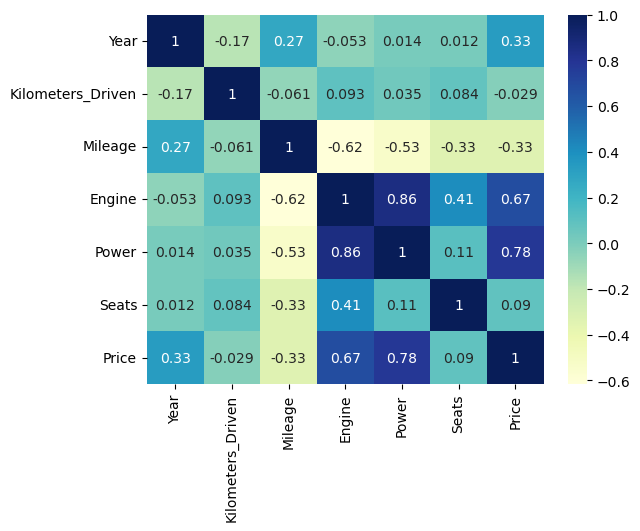

In [431]:
dataplot = sb.heatmap(df_correlation.corr(), cmap="YlGnBu", annot=True)

In [432]:
# Power and Engine have a greater correlation with Price, tried to take out Mileage & Kilo Driven from the Linear Regression 
# but the accuracy did not increas 

In [433]:
#final check on data type before fitting into the model
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6015 non-null   object  
 1   Year               6015 non-null   int64   
 2   Kilometers_Driven  6015 non-null   int64   
 3   Fuel_Type          6015 non-null   object  
 4   Transmission       6015 non-null   object  
 5   Owner_Type         6015 non-null   object  
 6   Mileage            6015 non-null   float64 
 7   Engine             6015 non-null   float64 
 8   Power              6015 non-null   float64 
 9   Seats              6015 non-null   float64 
 10  New_Price          823 non-null    object  
 11  Price              6015 non-null   float64 
 12  Brand              6015 non-null   object  
 13  Mean Price         6015 non-null   float64 
 14  Bins               6015 non-null   category
 15  Capped Mean Price  6015 non-null   float64 
 16  Capped

In [434]:
# modeling
import statsmodels.api as sm

In [435]:
# setting independent variables as x and dependent variable as y
x=df[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
y=df['Price']

In [436]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [437]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2517.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:04:47   Log-Likelihood:                -18190.
No. Observations:                6015   AIC:                         3.639e+04
Df Residuals:                    6008   BIC:                         3.644e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1906.5532     42.874    -44.469      0.000   -1990.601   -1822.505
Year                  0.9446      0.021     44.133      0.000       0.903       0.987
Kilometers_Driven -5.181e-07    7.2e-07     -0.720      0.472   -1.93e-06    8.93e-07
Mileage               0.0041      0.019      0.209      0.834      -0.034       0.042
Engine                0.0026      0.000      9.354      0.000       0.002       0.003
Power                 0.1138      0.003     40.542      0.000       0.108       0.119
Seats                -0.6036      0.104     -5.786      0.000      -0.808      -0.399
==============================================================================
Omnibus:                     1398.785   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11891.096
Skew:                           0.872   Prob(JB):                         0.00
Kurtosis:                       9.664   Cond. No.                     7.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [438]:
from sklearn.linear_model import LinearRegression

In [439]:
#using the numeric data to test the Linear Regression first
x=df[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]
y=df['Price']

In [440]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [441]:
simple_car_prediction = LinearRegression()
simple_car_prediction.fit(X_train, y_train)
y_pred= simple_car_prediction.predict(X_test)
print("Accuracy on Traing set: ",simple_car_prediction.score(X_train,y_train))
print("Accuracy on Testing set: ",simple_car_prediction.score(X_test,y_test))

Accuracy on Traing set:  0.7184705216793362
Accuracy on Testing set:  0.7017818141330034


In [442]:
import pickle
import requests
import json


In [443]:
pickle.dump(simple_car_prediction, open('model.pkl','wb'))

In [444]:
model = pickle.load(open("model.pkl","rb"))

In [445]:
year = input("Please provide the model year of your used car: ")

Please provide the model year of your used car: 0


In [446]:
kilo = input("Please provide the Kilometers driven of your used car: ")

Please provide the Kilometers driven of your used car: 0


In [447]:
mileage = input("Please provide the mileage(in kmpl) of your used car: ")

Please provide the mileage(in kmpl) of your used car: 0


In [448]:
engine = input("Please provide the engine(in CC) of your used car: ")

Please provide the engine(in CC) of your used car: 0


In [449]:
power = input("Please provide the power(in bhp) of your used car: ")

Please provide the power(in bhp) of your used car: 0


In [450]:
seats = input("Please provide the seats number of your used car: ")

Please provide the seats number of your used car: 0


In [451]:
arr = np.array([[float(year),float(kilo),float(mileage),float(engine),float(power),float(seats)]])

In [452]:
pred = model.predict(arr)

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [453]:
print(pred)

[-1939.69663083]


In [454]:
# Dealing with categorial columns
df_dummy = df

In [455]:
df_dummy.drop(['New_Price', 'Brand','Mean Price','Capped Mean Price','Bins'], axis=1, inplace= True)

In [456]:
df_dummy

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Capped Bins
0,Mumbai,2010,72000,CNG,Manual,First,37.3996,998.0,58.16,5.0,1.75,Low
1,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,12.50,Low
2,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,4.50,Low
3,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,6.00,Low
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,17.74,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4000,1248.0,74.00,5.0,4.75,Low
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4000,1120.0,71.00,5.0,4.00,Low
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0000,2498.0,112.00,8.0,2.90,Low
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9000,998.0,67.10,5.0,2.65,Low


In [457]:
df_dummy = pd.get_dummies(df_dummy)

In [465]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015 entries, 0 to 6018
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         6015 non-null   int64  
 1   Kilometers_Driven            6015 non-null   int64  
 2   Mileage                      6015 non-null   float64
 3   Engine                       6015 non-null   float64
 4   Power                        6015 non-null   float64
 5   Seats                        6015 non-null   float64
 6   Price                        6015 non-null   float64
 7   Location_Ahmedabad           6015 non-null   uint8  
 8   Location_Bangalore           6015 non-null   uint8  
 9   Location_Chennai             6015 non-null   uint8  
 10  Location_Coimbatore          6015 non-null   uint8  
 11  Location_Delhi               6015 non-null   uint8  
 12  Location_Hyderabad           6015 non-null   uint8  
 13  Location_Jaipur   

In [475]:
x=df_dummy[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Location_Ahmedabad',
            'Location_Bangalore','Location_Chennai','Location_Coimbatore', 'Location_Delhi','Location_Hyderabad',
            'Location_Jaipur','Location_Kochi','Location_Kolkata','Location_Mumbai','Location_Pune',
           'Fuel_Type_CNG', 'Fuel_Type_Diesel','Fuel_Type_Electric','Fuel_Type_LPG','Fuel_Type_Petrol',
            'Transmission_Automatic','Transmission_Manual','Owner_Type_First','Owner_Type_Fourth & Above',
            'Owner_Type_Second','Owner_Type_Third','Capped Bins_Low','Capped Bins_Relatively Low','Capped Bins_Medium',
            'Capped Bins_Relatively High','Capped Bins_High'
           ]]
           
y=df_dummy['Price']

In [476]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [478]:
#Accuracy of the Linear Regression increased
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)
print("Accuracy on Traing set: ",regressor.score(X_train,y_train))
print("Accuracy on Testing set: ",regressor.score(X_test,y_test))

Accuracy on Traing set:  0.841290554812302
Accuracy on Testing set:  0.7874462483929339


In [479]:
# END